In [15]:
import matplotlib.pyplot as plt
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from pyoperon.sklearn import SymbolicRegressor
from mbrl.models import Model
import torch

In [10]:
class Simple1DMDP(gym.Env):
    def __init__(self):
        super(Simple1DMDP, self).__init__()
        
        # define the action space
        self.action_space = spaces.Box(low=-1, high=1, shape=(1,), dtype=np.float32)
        
        # define the observation space: continuous single dimension for position
        self.observation_space = spaces.Box(low=-10, high=10, shape=(1,), dtype=np.float32)
        # Initialize state and episode length
        self.state = 0.0
        self.episode_length = 10
        self.current_step = 0

    def reset(self, seed=None):
        # reset the state to 0 and the step counter
        self.state = 0.0
        self.current_step = 0
        return np.array([self.state], dtype=np.float32)

    def step(self, action):  
        # update state based on action
        self.state += action
        # clip in the case we go outside of [-10,10]
        self.state = np.clip(self.state, -10.,10.)
        
        # calculate reward
        reward = np.cos(2 * np.pi * self.state) * np.exp(np.abs(self.state) / 3)
        # increment step counter
        self.current_step += 1
        # check if episode is terminated
        terminated = self.current_step >= self.episode_length
        # set placeholder for truncated
        truncated = False
        # set placeholder for info
        info = {}
        return np.array([self.state], dtype=np.float32), reward, terminated, truncated, info

    def render(self, mode='human'):
        # simple print rendering
        print(f"Step: {self.current_step}, State: {self.state}")

In [11]:
class SymbolicModel(Model):
    def __init__(self, symbols, population_size, generations, max_length):
        super().__init__("cpu")
        self.reg = SymbolicRegressor(population_size = population_size,
                                     allowed_symbols=symbols,
                                     optimizer_iterations=10,
                                     generations = generations,
                                     n_threads=32,
                                     max_evaluations=int(1e6),
                                     max_length = max_length,
                                     tournament_size = 3)
    def forward(self,x):
        return self.reg.predict(x), None
    
    def loss(self, model_in, target):
        return self.reg.score(model_in, target)
    
    def eval_score(self, model_in, target):
        return self.reg.score(model_in, target)

In [12]:
# Register the custom environment
gym.envs.registration.register(
    id='Simple1DMDP-v0',
    entry_point=Simple1DMDP
)


env = gym.make('Simple1DMDP-v0')

# Reset the environment
state = env.reset()
print(f"Initial State: {state}")

for _ in range(10):
    action = env.action_space.sample()  # Random action
    state, reward, terminated, truncated, info = env.step(action)

    print(f"Action: {action}, State: {state}, Reward: {reward}")
    env.render()

Initial State: [0.]
Action: [-0.00537572], State: [[-0.00537572]], Reward: [1.0012221]
Step: 1, State: [-0.00537572]
Action: [-0.6005226], State: [[-0.6058983]], Reward: [-0.96274775]
Step: 2, State: [-0.6058983]
Action: [-0.53731793], State: [[-1.1432163]], Reward: [0.91011256]
Step: 3, State: [-1.1432163]
Action: [-0.6051204], State: [[-1.7483367]], Reward: [-0.01871687]
Step: 4, State: [-1.7483367]
Action: [0.76688486], State: [[-0.9814518]], Reward: [1.3776019]
Step: 5, State: [-0.9814518]
Action: [-0.47968838], State: [[-1.4611402]], Reward: [-1.5792308]
Step: 6, State: [-1.4611402]
Action: [0.88805556], State: [[-0.5730846]], Reward: [-1.0850933]
Step: 7, State: [-0.5730846]
Action: [-0.5886306], State: [[-1.1617153]], Reward: [0.7757746]
Step: 8, State: [-1.1617153]
Action: [-0.37209427], State: [[-1.5338095]], Reward: [-1.6299256]
Step: 9, State: [-1.5338095]
Action: [-0.71171623], State: [[-2.2455258]], Reward: [0.05941537]
Step: 10, State: [-2.2455258]


In [19]:
env.reset()
rng = np.random.default_rng(seed=0)
obs_shape = env.observation_space.shape
act_shape = env.action_space.shape

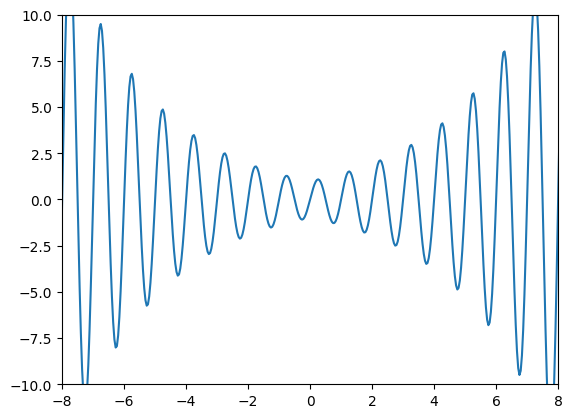

In [6]:
a = 2*np.random.rand(500) - 1
s = np.linspace(-10,10, 500)

plt.plot(s,np.sin(2*np.pi*s)*np.exp(np.abs(s)/3))
plt.xlim(-8,8)
plt.ylim(-10,10)
plt.show()